#  Project: Investigate TMDb Dataset <a name="top"></a> 

## Table of Contents

* [Introduction](#introduction)
* [Data Wrangling](#data-wrangling)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Conclusion](#conclusion)



 ## Introduction <a name="introduction"></a>

This project investigates The Movie Database,[TMDb](https://www.themoviedb.org/en).

It attempts to answer the following question:
* __What impact does budget have on  revenue?__

This investigation is carried out using the following python libraries and modules:
* pandas
* numpy
* matplotlib
* csv



In [65]:
# here all the necessary libraries are imported

import pandas as pd

import numpy as np

import matplotlib.pyplot as ply

%matplotlib inline

import os # this makes it possible to load files from local directory.






## Data Wrangling <a name="data-wrangling"></a>

In this section, the data will be loaded, and initial observations will be made. Also, if there's any need for 'cleaning', it will be done before we move on to the actual analysis.

In [85]:
# load the dataset

movies_df = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\tmdb-movies.csv')

# To return the size (shape)of the dataset as a tuple consisting of rows and columns

print(movies_df.shape)

(10866, 21)


The resulting tuple '(10866, 21)' tells us that there are 10,866 rows and 21 columns.

It would be practically impossible and not necessary to load the whole dataset at once, so the next  command is used to get an overiew of what the dataset looks like.

In [86]:
# To get a preview of the dataset (The first 5 rows by default)

movies_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [87]:
# The last 5 rows can also be called up

movies_df.tail()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


The dataset can also be checked for missing rows or blank cells.

In [88]:
# check which columns have missing values with info(), this also lists out all the columns.
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In the output above, we have column names and their corresponding appearances and datatypes listed. It is observed that the dataset is almost complete and most of the missing values are really of no consequence as they appear mostly in variables that are unlikely to be included in our analysis - variables such as **homepage**, **tagline**, **keyword** - so these can be safely dropped, in addition to other variables such as **id**, **imdb_id**, **overview** and **release_year** (all of which will not really add any insight to the analysis) 

There are 2 ways of pruning away unwanted variables:
* Deleting, achieved by using the drop() function
* Creating a new dataset entirely while including only the wanted variables.

The latter option is preferred sometimes, and will be applied in this case.

In [89]:
# The code below shows how to create a new dataset named 'movie_facts' from our existing dataset, 
# by 'reading' the filepath and appending only the columns we need ('usecols').

movie_facts = pd.read_csv(r'C:\\Users\jonathan\DataScienceProjects\tmdb-movies.csv', usecols=['popularity','budget','revenue','original_title','cast','director','runtime','genres','production_companies','release_date','vote_count','vote_average','budget_adj','revenue_adj'])

In [90]:
# crosscheck to see the new dataset was created properly
print(movie_facts.shape)
movie_facts.head()

(10866, 14)


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


The results above show that the original dataset, **movies_df** has been succefully trimmed down to 14 columns.

the new dataset can now be saved to local with the filename **new-movies.csv**.

In [7]:
# save the new dataset to local as movie_facts

movie_facts.to_csv(r'C:\\Users\jonathan\DataScienceProjects\new-movies.csv', index=False)

# list all the columns by name

list(movie_facts.columns) 

['popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'budget_adj',
 'revenue_adj']

In [8]:
# Get a high level overview of the dataset contents

movie_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


The output above shows us  the list of column headers as well as their datatype, labelled as *Dtype*, and the amount of rows in each column with data in them, *Non-Null* 



Now we are going to clean the dataset further by performing the following operations:

* listing out count of missng data in the columns
* removing the rows without data
* crosschecking to see if null data has been dropped

In [9]:
# listing out count of missng data in the columns
movie_facts.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
budget_adj                 0
revenue_adj                0
dtype: int64

The results above show the various columns and the corresponding missing data counts, with **production_companies** having the highest count, while several others are complete, indicated by **0**. 

In [91]:
# removing the rows without data

movie_facts.dropna(inplace=True)

In [92]:
# crosschecking to see if null data has been dropped

movie_facts.isnull().sum().any()

False

Output is false, this means there are no longer blank cells in our dataset, great! 
We can now proceed with the analysis

## Exploratory Data Analysis <a name="analysis"></a>

In this section, by means of statistical visualizations, the dataset will be explored. This with a view to answering the question posed in the introduction:

### What impact does budget have on revenue?

Observation of the dataset shows that there are 2 columns with the names *budget* and *budget_adj*, similar to *revenue* and *revenue_adj*. Here, the columns of interest are **revenue_adj** and **budget_adj**.
This is so because *budget* and *revenue* represent actual figures as at the time of production, while *budget_adj* and *revenue_adj* represent figures adjusted to account for inflation.

This is important in order for us to get a more accurate analysis.

For example, **1** million dollars in 1950 would be worth well over **10** million dollars in 2020, due to an annual inflation rate of 3.4% over this period. Check out this [site](https://www.dollartimes.com/inflation/inflation.php?amount=1000000&year=1950) for more information.

So what this means is that a movie with a budget of a million dollars in 1950 actually spent more than a movie in 2020  with a budget of say 5 million dollars, over twice as much when inflation is taken into consideration.

So in order for the data analysis not to be biased against movies produced a long time ago compared to more recent ones, 
it is neccessary to use the figures adjusted for inflation.






Before we start plotting the two variables together, it would be nice to get a visual representation of each of them.
This will be achieved using **boxplots**.

#### Boxplot for **revenue_adj**

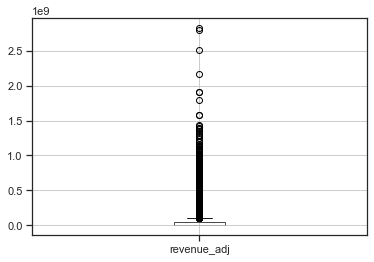

In [103]:
movie_facts.boxplot(column=['revenue_adj']) 


The output above shows the range of the **revenue_adj** variable, from the base a little above the **0.0** mark at the bottom to above **2.5** at the top. At the top left, there's a superscription, **1e9**, this is a scientific notation that means the number 1 trailed by 9 zeros, that is 1,000,000,000. So a figure of 2.5 means 2,500,000,000 (2.5 multiplied by 1,000,000,000)

#### Boxplot for **budget_adj**

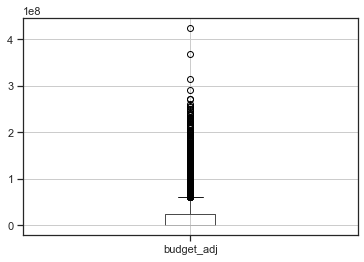

In [101]:
movie_facts.boxplot(column=['budget_adj'])

Above we see the output for the  **budget_adj** variable, with a range of about 0.7e9 to about 4.5e9 (see paragraph above for explanation of **e9**)

Now, in order to visualize  the correlation between **revenue_adj** and **budget_adj**, two charts will be made use of:

* **scatterplot**
* **line chart**

 Scatterplots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. 
 
 Line charts are also used to track changes over periods of time. When smaller changes exist, line graphs give a better overview. 





#### Scatterplot ####

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


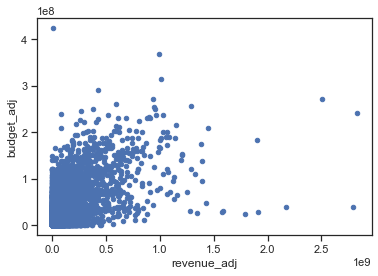

In [107]:
movie_facts.plot(x='revenue_adj', y='budget_adj', kind='scatter');

The output above shows a clear relationship between the two variables being considered, as there's a tendency for there to be a corresponding increase with both variables. 

#### Line Chart ####

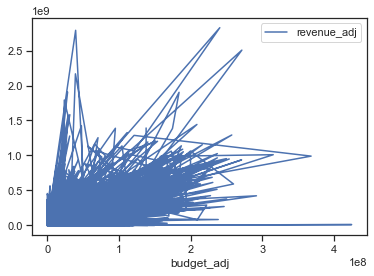

In [71]:
movie_facts.plot(x='budget_adj', y='revenue_adj', kind='line');

The line chart further confirms the observation made from the scatterplot above. This time, some outliers can be observed more clearly in the visualization.






## Conclusion <a name="conclusion"></a>

The charts above show that there is a strong positive correlationship between budget and revenue, for the higher the budget, the higher the revenue will most likely be and vice versa for low budget. This is not to conclude that a high budget will definitely lead to high revenue, but it does increase the chances thereof.


### [Back to the top]( #top)